# Tratamento de dados

In [217]:
import pandas as pd 
import warnings

In [218]:
tabela = pd.read_excel("Desafio Inteligência 1.xlsx", sheet_name="Base")
tabela.head()

,CONTRATO,DATA DA CRIACAO,DIARIAS,VALOR TOTAL,ORIGEM
0,Loja 11000,2022-12-19,7,1933.88,SITE
1,Loja 21001,2022-07-28,4,748.15,APLICATIVO
2,Loja 11002,2023-08-20,6,459.04,PARCEIRO 1
3,Loja 11003,2022-03-24,10,1079.76,PARCEIRO 2
4,Loja 31004,2022-05-13,1,202.03,SITE


In [219]:
tabela["FATURAMENTO"] = tabela["VALOR TOTAL"] * tabela["DIARIAS"]

In [220]:
tabela.info()
tabela.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54536 entries, 0 to 54535
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CONTRATO         54536 non-null  object        
 1   DATA DA CRIACAO  54536 non-null  datetime64[ns]
 2   DIARIAS          54536 non-null  int64         
 3   VALOR TOTAL      54536 non-null  float64       
 4   ORIGEM           54536 non-null  object        
 5   FATURAMENTO      54536 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.5+ MB


,CONTRATO,DATA DA CRIACAO,DIARIAS,VALOR TOTAL,ORIGEM,FATURAMENTO
0,Loja 11000,2022-12-19,7,1933.88,SITE,13537.16
1,Loja 21001,2022-07-28,4,748.15,APLICATIVO,2992.60
2,Loja 11002,2023-08-20,6,459.04,PARCEIRO 1,2754.24
3,Loja 11003,2022-03-24,10,1079.76,PARCEIRO 2,10797.60
4,Loja 31004,2022-05-13,1,202.03,SITE,202.03


In [221]:
tabela["ANO"] = tabela["DATA DA CRIACAO"].dt.year
tabela["MES"] = tabela["DATA DA CRIACAO"].dt.month
tabela["DIA_SEMANA"] = tabela["DATA DA CRIACAO"].dt.dayofweek  # 0 = segunda, 6 = domingo

In [222]:
tabela.info()
tabela.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54536 entries, 0 to 54535
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CONTRATO         54536 non-null  object        
 1   DATA DA CRIACAO  54536 non-null  datetime64[ns]
 2   DIARIAS          54536 non-null  int64         
 3   VALOR TOTAL      54536 non-null  float64       
 4   ORIGEM           54536 non-null  object        
 5   FATURAMENTO      54536 non-null  float64       
 6   ANO              54536 non-null  int32         
 7   MES              54536 non-null  int32         
 8   DIA_SEMANA       54536 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(2)
memory usage: 3.1+ MB


,CONTRATO,DATA DA CRIACAO,DIARIAS,VALOR TOTAL,ORIGEM,FATURAMENTO,ANO,MES,DIA_SEMANA
0,Loja 11000,2022-12-19,7,1933.88,SITE,13537.16,2022,12,0
1,Loja 21001,2022-07-28,4,748.15,APLICATIVO,2992.60,2022,7,3
2,Loja 11002,2023-08-20,6,459.04,PARCEIRO 1,2754.24,2023,8,6
3,Loja 11003,2022-03-24,10,1079.76,PARCEIRO 2,10797.60,2022,3,3
4,Loja 31004,2022-05-13,1,202.03,SITE,202.03,2022,5,4


In [223]:
tabela.drop(columns=["DATA DA CRIACAO"], inplace=True)


In [224]:
from sklearn.preprocessing import LabelEncoder

# Criar o objeto LabelEncoder
le = LabelEncoder()

# Aplicar nas colunas
tabela["CONTRATO"] = le.fit_transform(tabela["CONTRATO"])
tabela["ORIGEM"] = le.fit_transform(tabela["ORIGEM"])



In [225]:
tabela.info()
tabela.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54536 entries, 0 to 54535
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CONTRATO     54536 non-null  int32  
 1   DIARIAS      54536 non-null  int64  
 2   VALOR TOTAL  54536 non-null  float64
 3   ORIGEM       54536 non-null  int32  
 4   FATURAMENTO  54536 non-null  float64
 5   ANO          54536 non-null  int32  
 6   MES          54536 non-null  int32  
 7   DIA_SEMANA   54536 non-null  int32  
dtypes: float64(2), int32(5), int64(1)
memory usage: 2.3 MB


,CONTRATO,DIARIAS,VALOR TOTAL,ORIGEM,FATURAMENTO,ANO,MES,DIA_SEMANA
0,0,7,1933.88,3,13537.16,2022,12,0
1,24339,4,748.15,0,2992.60,2022,7,3
2,6,6,459.04,1,2754.24,2023,8,6
3,10,10,1079.76,2,10797.60,2022,3,3
4,39068,1,202.03,3,202.03,2022,5,4


In [226]:
# Criar a matriz de correlação
correlation_matrix = tabela.corr()

# Exibir a tabela de correlação
print(correlation_matrix)

             CONTRATO   DIARIAS  VALOR TOTAL    ORIGEM  FATURAMENTO       ANO  \
CONTRATO     1.000000 -0.045890    -0.009995  0.005501     0.014944  0.183256   
DIARIAS     -0.045890  1.000000     0.753429 -0.006181     0.755176 -0.052883   
VALOR TOTAL -0.009995  0.753429     1.000000 -0.001651     0.773296  0.021680   
ORIGEM       0.005501 -0.006181    -0.001651  1.000000    -0.002930 -0.000837   
FATURAMENTO  0.014944  0.755176     0.773296 -0.002930     1.000000 -0.013473   
ANO          0.183256 -0.052883     0.021680 -0.000837    -0.013473  1.000000   
MES          0.024136 -0.020125     0.000993  0.000138     0.005369 -0.072470   
DIA_SEMANA   0.014853 -0.074937    -0.053621 -0.001351    -0.036815 -0.021828   

                  MES  DIA_SEMANA  
CONTRATO     0.024136    0.014853  
DIARIAS     -0.020125   -0.074937  
VALOR TOTAL  0.000993   -0.053621  
ORIGEM       0.000138   -0.001351  
FATURAMENTO  0.005369   -0.036815  
ANO         -0.072470   -0.021828  
MES          1.000

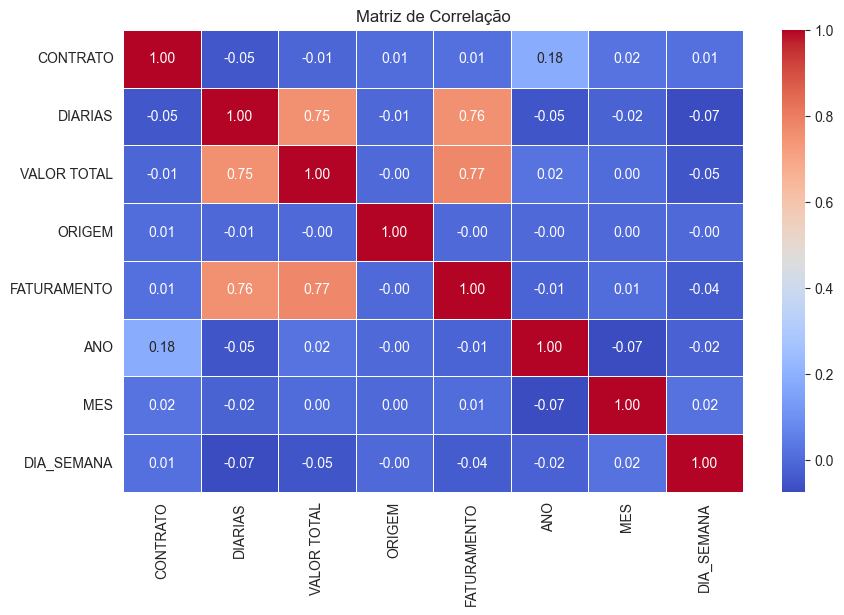

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

# Criação do Modelo

In [228]:
# Features
X = tabela.drop('FATURAMENTO',axis=1)

# Target(alvo)

y = tabela['FATURAMENTO']

In [229]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Definição do modelo XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)

# Validação Cruzada para R²
r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Validação Cruzada para MSE
mse_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Validação Cruzada para MAE
mae_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Resultados
print(f"Média do R²: {np.mean(r2_scores):.4f}")
print(f"Média do MSE: {-np.mean(mse_scores):.4f}")  # Inverte o sinal do MSE
print(f"Média do MAE: {-np.mean(mae_scores):.4f}")  # Inverte o sinal do MAE

Média do R²: 0.8801
Média do MSE: 151942153.8597
Média do MAE: 573.5287


In [230]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Definição do modelo
model = xgb.XGBRegressor(objective='reg:squarederror')

# Definição do espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Número de árvores
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Taxa de aprendizado
    'max_depth': [3, 5, 7, 10],  # Profundidade máxima da árvore
    'subsample': [0.6, 0.8, 1.0],  # Porcentagem de amostras usadas por árvore
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fracção de colunas usadas por árvore
}

# Definição do RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,  # Número de combinações aleatórias a testar
    scoring='r2',  # Otimizando para R²
    cv=5,  # Validação cruzada de 5 folds
    verbose=1,
    n_jobs=-1  # Paraleliza o processo
)

# Executar a busca pelos melhores hiperparâmetros
random_search.fit(X, y)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", random_search.best_params_)

# Melhor modelo encontrado
best_model = random_search.best_estimator_

# Avaliação do melhor modelo
r2_best = best_model.score(X, y)
print(f"Melhor R² encontrado: {r2_best:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores hiperparâmetros: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Melhor R² encontrado: 0.9982


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GroupKFold

# Definição do modelo XGBoost Regressor com hiperparâmetros otimizados
model = xgb.XGBRegressor(
    n_estimators=300,         # Ajuste para 300 estimadores
    learning_rate=0.1,        # Ajuste para a taxa de aprendizado
    max_depth=7,              # Ajuste para a profundidade máxima da árvore
    subsample=0.6,            # Ajuste para usar 100% das amostras
    colsample_bytree=1.0      # Ajuste para 80% das features em cada árvore
)
groups = tabela['ANO']
# Definindo o GroupKFold com 3 divisões
gkf = GroupKFold(n_splits=3)

# Validação Cruzada para R²
r2_scores = cross_val_score(model, X, y, cv=gkf.split(X, y, groups), scoring='r2')

# Validação Cruzada para MSE
mse_scores = cross_val_score(model, X, y, cv=gkf.split(X, y, groups), scoring='neg_mean_squared_error')

# Validação Cruzada para MAE
mae_scores = cross_val_score(model, X, y, cv=gkf.split(X, y, groups), scoring='neg_mean_absolute_error')

# Resultados
print(f"Média do R²: {np.mean(r2_scores):.4f}")
print(f"Média do MSE: {-np.mean(mse_scores):.4f}")  # Inverte o sinal do MSE
print(f"Média do MAE: {-np.mean(mae_scores):.4f}")  # Inverte o sinal do MAE


Média do R²: 0.7980
Média do MSE: 190038504.0662
Média do MAE: 513.2014


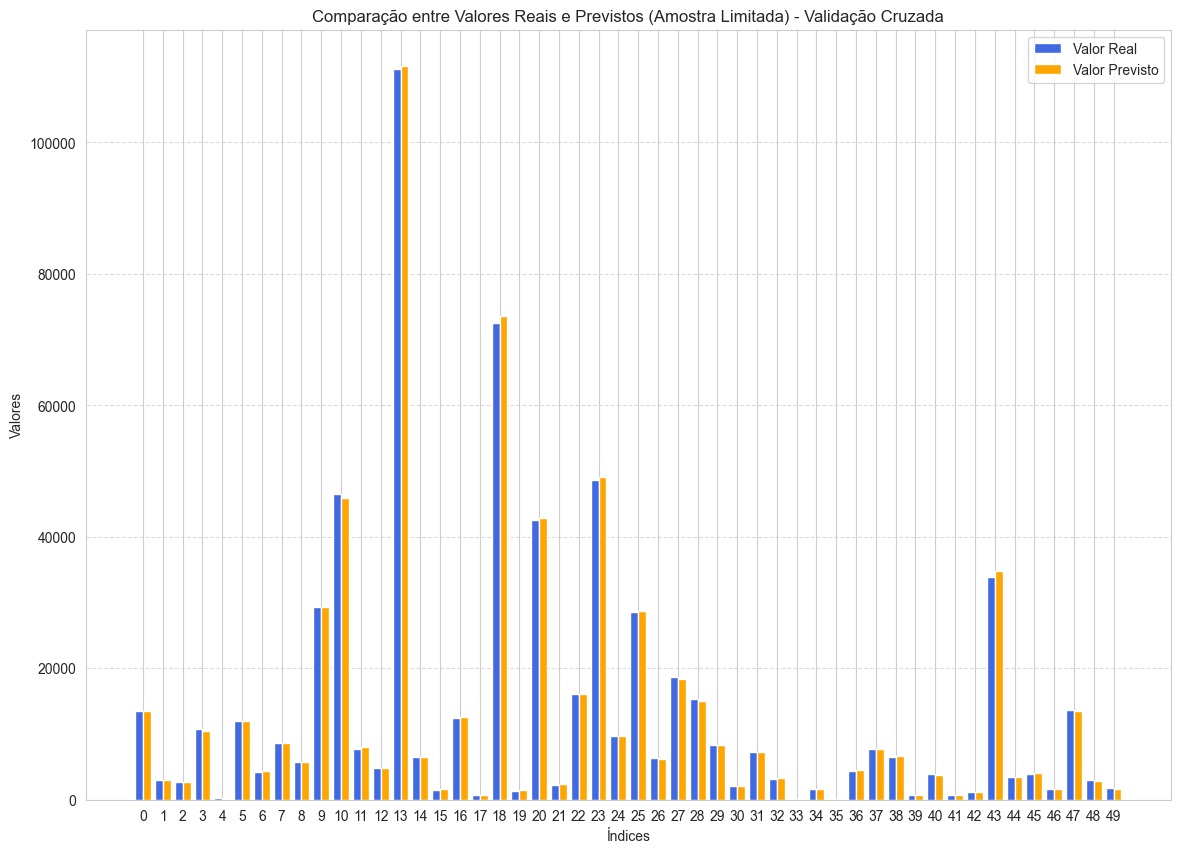

In [233]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Definição do modelo XGBoost Regressor com hiperparâmetros otimizados
model = xgb.XGBRegressor(
    n_estimators=300,         # Ajuste para 300 estimadores
    learning_rate=0.1,        # Ajuste para a taxa de aprendizado
    max_depth=7,              # Ajuste para a profundidade máxima da árvore
    subsample=0.6,            # Ajuste para usar 100% das amostras
    colsample_bytree=1.0      # Ajuste para 80% das features em cada árvore
)

# Validação Cruzada (gera previsões para cada amostra)
y_predict = cross_val_predict(model, X, y, cv=10)

# Define a quantidade de amostras a serem exibidas no gráfico
n_amostra = 50 
y_test_amostra = y.iloc[:n_amostra]  # Valores reais
y_predict_amostra = y_predict[:n_amostra]  # Valores previstos

# Criação do índice das barras
indices = np.arange(len(y_test_amostra))
largura_barra = 0.4  # Largura das barras

plt.figure(figsize=(14, 10))

# Gráfico de barras comparando valores reais e previstos
plt.bar(indices - largura_barra/2, y_test_amostra, width=largura_barra, label='Valor Real', color='royalblue')
plt.bar(indices + largura_barra/2, y_predict_amostra, width=largura_barra, label='Valor Previsto', color='orange')

# Personalizações
plt.legend()
plt.xlabel('Índices')
plt.ylabel('Valores')
plt.title('Comparação entre Valores Reais e Previstos (Amostra Limitada) - Validação Cruzada')
plt.xticks(indices)  # Define os índices no eixo X
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.show()


C:\Users\victo\AppData\Local\Temp\ipykernel_13464\3572568800.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importância', data=importancia_features, palette="Blues_r")  # Azul


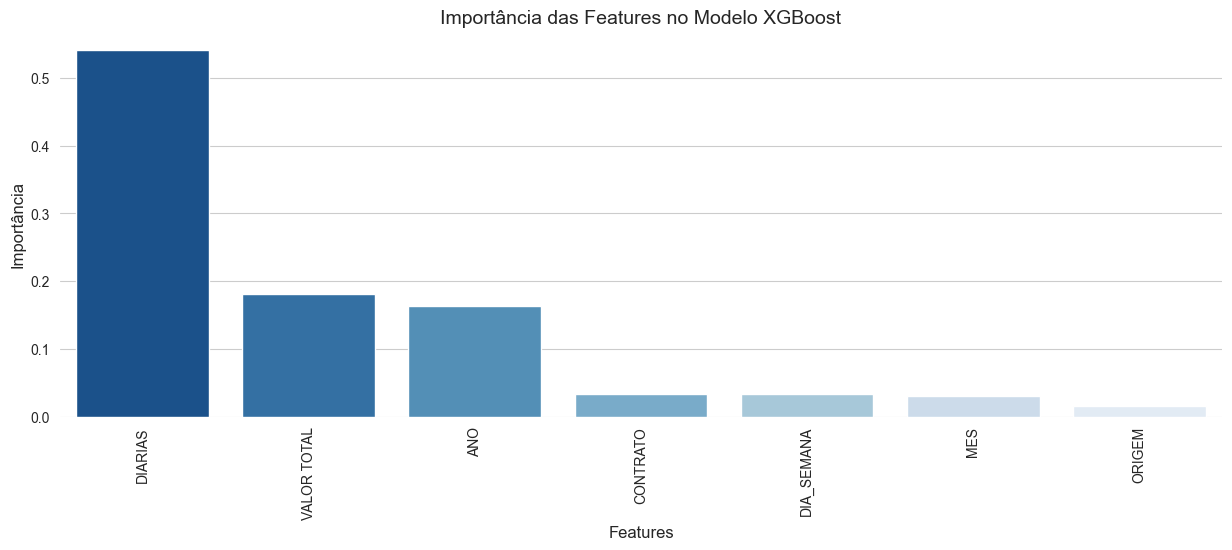

In [234]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando e treinando o modelo XGBoost
model = xgb.XGBRegressor()  # ou XGBClassifier() para classificação
model.fit(X, y)

# Obtém a importância das features
importancia_features = pd.DataFrame({
    'Feature': X.columns,
    'Importância': model.feature_importances_
}).sort_values(by='Importância', ascending=False)

# Configuração do estilo do gráfico
sns.set_style("whitegrid")  # Remove linhas pretas do fundo

# Plot do gráfico de importância
plt.figure(figsize=(15, 5))
sns.barplot(x='Feature', y='Importância', data=importancia_features, palette="Blues_r")  # Azul
plt.title('Importância das Features no Modelo XGBoost', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importância', fontsize=12)
plt.xticks(rotation=90)

# Remove a borda ao redor do gráfico
sns.despine(left=True, bottom=True)

plt.show()


Média do R²: 0.7980
Média do MSE: 190038504.0662
Média do MAE: 513.2014


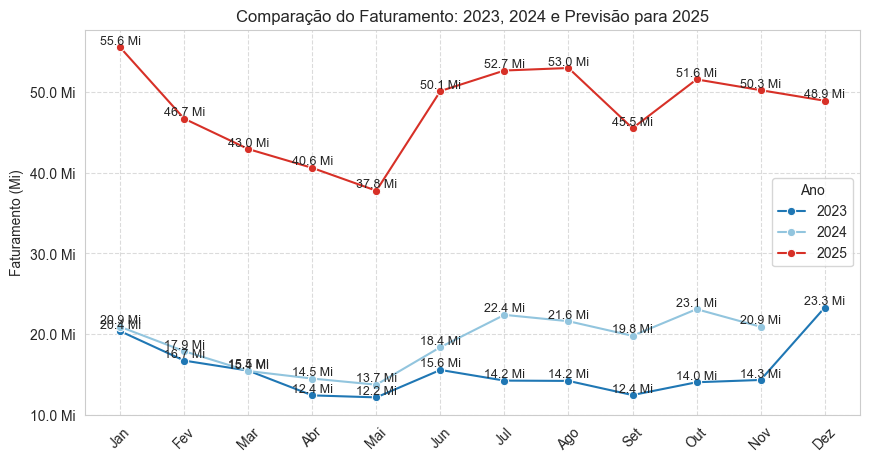

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GroupKFold, cross_val_score

# Criar os DataFrames dos anos anteriores
df_2023 = tabela[tabela['ANO'] == 2023].groupby('MES')['FATURAMENTO'].sum().reset_index()
df_2024 = tabela[tabela['ANO'] == 2024].groupby('MES')['FATURAMENTO'].sum().reset_index()

# Conjunto de dados para previsão de 2025
proximo_ano = tabela['ANO'].max() + 1  # Define o próximo ano (2025)
novo_X = X.copy()
novo_X['ANO'] = proximo_ano  # Define o ano futuro

# Preparando os dados para o modelo
X = tabela.drop(columns=['FATURAMENTO'])  # Supondo que 'FATURAMENTO' seja a variável target
y = tabela['FATURAMENTO']
groups = tabela['ANO']  # Usando o 'ANO' como grupo para o GroupKFold

# Definindo o modelo XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=300,         # Ajuste para 300 estimadores
    learning_rate=0.1,        # Ajuste para a taxa de aprendizado
    max_depth=7,              # Ajuste para a profundidade máxima da árvore
    subsample=0.6,            # Ajuste para usar 100% das amostras
    colsample_bytree=1.0      # Ajuste para 80% das features em cada árvore
)

# Definindo o GroupKFold com 3 divisões
gkf = GroupKFold(n_splits=3)

# Validação cruzada para o modelo com GroupKFold
cv_scores_r2 = cross_val_score(model, X, y, cv=gkf.split(X, y, groups), scoring='r2')
cv_scores_mse = cross_val_score(model, X, y, cv=gkf.split(X, y, groups), scoring='neg_mean_squared_error')
cv_scores_mae = cross_val_score(model, X, y, cv=gkf.split(X, y, groups), scoring='neg_mean_absolute_error')

# Resultados da validação cruzada
print(f"Média do R²: {np.mean(cv_scores_r2):.4f}")
print(f"Média do MSE: {-np.mean(cv_scores_mse):.4f}")  # Inverte o sinal do MSE
print(f"Média do MAE: {-np.mean(cv_scores_mae):.4f}")  # Inverte o sinal do MAE

# Treinando o modelo com a validação cruzada aplicada
model.fit(X, y)

# Prevendo para o próximo ano (2025) usando o modelo treinado
y_pred_2025 = model.predict(novo_X)

# Criando o DataFrame de previsão para 2025
df_2025 = pd.DataFrame({'MES': novo_X['MES'], 'FATURAMENTO': y_pred_2025})
df_2025 = df_2025.groupby('MES').sum().reset_index()

# Adicionando a coluna de ano para cada DataFrame
df_2023['ANO'] = 2023
df_2024['ANO'] = 2024
df_2025['ANO'] = 2025

# Concatenando os DataFrames
df_final = pd.concat([df_2023, df_2024, df_2025])

# Mapeamento dos meses para nomes abreviados
meses_abrev = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
               7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
df_final['MES'] = df_final['MES'].map(meses_abrev)

# Definindo a paleta de cores em tons de azul
paleta_azul = {2023: "#1f77b4", 2024: "#92c5de", 2025: "#d73027"}  # Tons de azul

# Criar o gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_final, x='MES', y='FATURAMENTO', hue='ANO', marker='o', palette=paleta_azul)

# Adicionar os valores em cima de cada ponto
for year in df_final['ANO'].unique():
    for i in range(len(df_final[df_final['ANO'] == year])):
        row = df_final[df_final['ANO'] == year].iloc[i]
        plt.text(row['MES'], row['FATURAMENTO'], f'{row["FATURAMENTO"] / 1e6:.1f} Mi', 
                 ha='center', va='bottom', fontsize=9)

# Formatar eixo Y para milhões
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f} Mi'))

# Ajustes do gráfico
plt.xlabel('')
plt.ylabel('Faturamento (Mi)')
plt.title(f'Comparação do Faturamento: 2023, 2024 e Previsão para {proximo_ano}')
plt.xticks(rotation=45)  # Rotacionar os meses para melhor legibilidade
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Ano')

# Exibir o gráfico
plt.show()


In [243]:
## Calcular o faturamento médio geral
faturamento_medio_geral = tabela["FATURAMENTO"].mean()

# Calcular o percentual do MAE em relação ao faturamento médio
percentual_mae = (513.2014 / faturamento_medio_geral) * 100

# Exibir com 2 casas decimais e sinal de porcentagem
print(f"MAE como % do Faturamento Médio: {percentual_mae:.2f}%")

MAE como % do Faturamento Médio: 4.93%
